In [20]:
import torch
import torch.nn as nn
import torch.utils.data as Data 
import numpy as np
import pandas as pd
import sys
sys.path.append("..")    # 对于模块和自己写的脚本不在同一个目录下，在脚本开头加sys.path.append(’引用模块的地址')
import d2lzh as d2l
import matplotlib.pyplot as plt 
%matplotlib inline

print(torch.__version__)
torch.set_default_tensor_type(torch.FloatTensor)

1.3.0


In [21]:
train_data = pd.read_csv('house_train.csv')
test_data = pd.read_csv('house_test.csv')
print(train_data.shape, test_data.shape)

(1460, 81)(1459, 80)


In [22]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
all_features = pd.concat((train_data.iloc[:, 1:-1], test_data.iloc[:, 1:])) # 合并清洗数据
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [24]:
all_features.shape

(2919, 79)

In [25]:
# 归一化
numeric_features = all_features.dtypes[all_features.dtypes != 'object'].index
all_features[numeric_features] = all_features[numeric_features].apply(
    lambda x: (x - x.mean()) / (x.std()))
# 标准化后，每个特征的均值变为0，所以可以直接用0来替换缺失值
all_features = all_features.fillna(0)
all_features.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.067320,RL,-0.184443,-0.217841,Pave,0,Reg,Lvl,AllPub,Inside,...,-0.285886,-0.063139,0,0,0,-0.089577,-1.551918,0.157619,WD,Normal
1,-0.873466,RL,0.458096,-0.072032,Pave,0,Reg,Lvl,AllPub,FR2,...,-0.285886,-0.063139,0,0,0,-0.089577,-0.446848,-0.602858,WD,Normal
2,0.067320,RL,-0.055935,0.137173,Pave,0,IR1,Lvl,AllPub,Inside,...,-0.285886,-0.063139,0,0,0,-0.089577,1.026577,0.157619,WD,Normal
3,0.302516,RL,-0.398622,-0.078371,Pave,0,IR1,Lvl,AllPub,Corner,...,-0.285886,-0.063139,0,0,0,-0.089577,-1.551918,-1.363335,WD,Abnorml
4,0.067320,RL,0.629439,0.518814,Pave,0,IR1,Lvl,AllPub,FR2,...,-0.285886,-0.063139,0,0,0,-0.089577,2.131647,0.157619,WD,Normal


In [26]:
# dummy_na=True将缺失值也当作合法的特征值并为其创建指示特征
all_features = pd.get_dummies(all_features, dummy_na=True)
print(all_features.shape)
all_features.head()

(2919, 354)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
0,0.067320,-0.184443,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.523038,0.580708,-0.29303,...,0,1,0,0,0,0,0,1,0,0
1,-0.873466,0.458096,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.569893,1.177709,-0.29303,...,0,1,0,0,0,0,0,1,0,0
2,0.067320,-0.055935,0.137173,0.646073,-0.507197,0.980053,0.848819,0.333448,0.097840,-0.29303,...,0,1,0,0,0,0,0,1,0,0
3,0.302516,-0.398622,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.569893,-0.494771,-0.29303,...,0,1,0,1,0,0,0,0,0,0
4,0.067320,0.629439,0.518814,1.355319,-0.507197,0.947040,0.753100,1.381770,0.468770,-0.29303,...,0,1,0,0,0,0,0,1,0,0


In [27]:
all_features.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_Oth,SaleType_WD,SaleType_nan,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_nan
count,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,2.919000e+03,...,2919.000000,2919.000000,2919.0,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.0
mean,8.641407e-17,5.842078e-17,2.921039e-17,-1.399665e-16,3.468734e-16,-5.653428e-16,6.815758e-16,5.355238e-17,2.312489e-17,-1.460519e-17,...,0.002398,0.865022,0.0,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933,0.0
std,1.000000e+00,9.129335e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.960511e-01,9.998286e-01,9.998286e-01,...,0.048920,0.341758,0.0,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335,0.0
min,-8.734664e-01,-2.069222e+00,-1.124397e+00,-3.609406e+00,-4.100666e+00,-3.278576e+00,-1.639892e+00,-5.698929e-01,-9.688603e-01,-2.930296e-01,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-8.734664e-01,-3.986221e-01,-3.410822e-01,-7.724201e-01,-5.071973e-01,-5.880466e-01,-9.219947e-01,-5.698929e-01,-9.688603e-01,-2.930296e-01,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
50%,-1.678767e-01,0.000000e+00,-9.067002e-02,-6.317371e-02,-5.071973e-01,5.569962e-02,4.180809e-01,-5.698929e-01,-1.589585e-01,-2.930296e-01,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
75%,3.025164e-01,3.724241e-01,1.777465e-01,6.460727e-01,3.911698e-01,9.800531e-01,9.445391e-01,3.418125e-01,6.399689e-01,-2.930296e-01,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0
max,3.124875e+00,1.043886e+01,2.600190e+01,2.773812e+00,3.086271e+00,1.277167e+00,1.231698e+00,8.351994e+00,1.141891e+01,8.725584e+00,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [28]:
# 通过values属性得到NumPy格式的数据，并转成NDArray方便后面的训练
n_train = train_data.shape[0]
train_features = torch.tensor(all_features[:n_train].values, dtype=torch.float)
test_features = torch.tensor(all_features[n_train:].values, dtype=torch.float)
train_labels = torch.tensor(train_data.SalePrice.values, dtype=torch.float).view(-1, 1)

In [35]:
loss = torch.nn.MSELoss()

def get_net(feature_num):
    net = nn.Linear(feature_num, 1)
    for param in net.parameters():
        nn.init.normal_(param, mean=0, std=0.01) # 从给定均值和标准差的正态分布N(mean, std)中生成值，填充输入的张量或变量
    return net

In [30]:
def log_rmse(net, features, labels):
    with torch.no_grad():    #不需要计算梯度，也不会进行反向传播
        # 将小于1的值设成1，使得取对数时数值更稳定
        clipped_preds = torch.max(net(features), torch.tensor(1.0))
        rmse = torch.sqrt(2 * loss(clipped_preds.log(), labels.log()).mean())
    return rmse.item()

In [31]:
def train(net, train_features, train_labels, test_features, test_labels,
          num_epochs, learning_rate, weight_decay, batch_size):
    train_ls, test_ls = [], []
    dataset = Data.TensorDataset(train_features, train_labels)
    train_iter = Data.DataLoader(dataset, batch_size, shuffle=True)
    # 这里使用了Adam优化算法
    optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate, weight_decay=weight_decay) 
    net = net.float()
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X.float()), y.float())
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(log_rmse(net, train_features, train_labels))
        if test_labels is not None:
            test_ls.append(log_rmse(net, test_features, test_labels))
    return train_ls, test_ls

In [32]:
def get_k_fold_data(k, i, X, y):
    # 返回第i折交叉验证时所需要的训练和验证数据
    assert k > 1
    fold_size = X.shape[0] // k
    X_train, y_train = None, None
    for j in range(k):
        idx = slice(j * fold_size, (j + 1) * fold_size)
        X_part, y_part = X[idx, :], y[idx]
        if j == i:
            X_valid, y_valid = X_part, y_part
        elif X_train is None:
            X_train, y_train = X_part, y_part
        else:
            X_train = torch.cat((X_train, X_part), dim=0)
            y_train = torch.cat((y_train, y_part), dim=0)
    return X_train, y_train, X_valid, y_valid

In [33]:
def k_fold(k, X_train, y_train, num_epochs,
           learning_rate, weight_decay, batch_size):
    train_l_sum, valid_l_sum = 0, 0
    for i in range(k):
        data = get_k_fold_data(k, i, X_train, y_train)
        net = get_net(X_train.shape[1])
        train_ls, valid_ls = train(net, *data, num_epochs, learning_rate,
                                   weight_decay, batch_size)
        train_l_sum += train_ls[-1]
        valid_l_sum += valid_ls[-1]
        if i == 0:
            d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse',
                         range(1, num_epochs + 1), valid_ls,
                         ['train', 'valid'])
        print('fold %d, train rmse %f, valid rmse %f' % (i, train_ls[-1], valid_ls[-1]))
    return train_l_sum / k, valid_l_sum / k

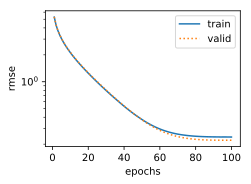

fold 0, train rmse 0.240273, valid rmse 0.221306
fold 1, train rmse 0.229262, valid rmse 0.266797
fold 2, train rmse 0.232165, valid rmse 0.238501
fold 3, train rmse 0.236787, valid rmse 0.218655
fold 4, train rmse 0.230283, valid rmse 0.258898
5-fold validation: avg train rmse 0.233754, avg valid rmse 0.240831


In [36]:
k, num_epochs, lr, weight_decay, batch_size = 5, 100, 5, 0, 64
train_l, valid_l = k_fold(k, train_features, train_labels, num_epochs, lr, weight_decay, batch_size)
print('%d-fold validation: avg train rmse %f, avg valid rmse %f' % (k, train_l, valid_l))

In [37]:
def train_and_pred(train_features, test_features, train_labels, test_data,
                   num_epochs, lr, weight_decay, batch_size):
    net = get_net(train_features.shape[1])
    train_ls, _ = train(net, train_features, train_labels, None, None,
                        num_epochs, lr, weight_decay, batch_size)
    d2l.semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'rmse')
    print('train rmse %f' % train_ls[-1])
    preds = net(test_features).detach().numpy()
    test_data['SalePrice'] = pd.Series(preds.reshape(1, -1)[0])
    submission = pd.concat([test_data['Id'], test_data['SalePrice']], axis=1)
    submission.to_csv('./submission_wkd.csv', index=False)

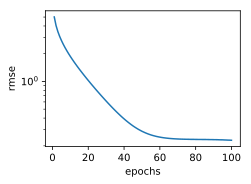

train rmse 0.229994


In [38]:
train_and_pred(train_features, test_features, train_labels, test_data, num_epochs, lr, weight_decay, batch_size)

In [39]:
submission = pd.read_csv('submission_wkd.csv')
submission.head()

,Id,SalePrice
0,1461,119429.00
1,1462,153701.70
2,1463,198539.17
3,1464,217135.14
4,1465,177230.77
